#### Importing Packages 

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



# Supress warnings
warnings.filterwarnings('ignore')

#### Importing Data

In [41]:
walmart_sales = pd.read_csv('Data\Walmart_Store_sales.csv')

walmart_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


The data has been successfully loaded.

**The next step is ***Data Overview and Cleaning***, it is always a good idea to check the data types, missing values and the size of the data.**

In [42]:
walmart_sales.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


All columns in the dataset contain 6435 non-null values, indicating no apparent missing values. This is a positive sign for data completeness. However, missing values could still exist if encoded in a non-standard format (e.g., placeholders like "N/A" or -1), which will be investigated further during exploratory analysis.

**Converting Date column to datetime datatype**

In [43]:
walmart_sales['Date'] = pd.to_datetime(walmart_sales['Date'], format='%d-%m-%Y')


#### Data Analysis

**Descriptive Statistics**

In [44]:
walmart_sales.describe()    

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


**Store Analysis**

In [45]:
store_weekly_sales=walmart_sales.groupby('Store')[['Weekly_Sales']].sum().sort_values(by='Weekly_Sales', ascending=True)

print(f'The first 5 stores with` the lowest sales are:\n')
display(store_weekly_sales[:5])

print(f'The first 5 stores with the highest sales are:\n')
display(store_weekly_sales[-5:])

The first 5 stores with` the lowest sales are:



,Weekly_Sales
Store,
33,37160221.96
44,43293087.84
5,45475688.90
36,53412214.97
38,55159626.42


The first 5 stores with the highest sales are:



,Weekly_Sales
Store,
2,2.753824e+08
13,2.865177e+08
14,2.889999e+08
4,2.995440e+08
20,3.013978e+08


In [46]:
print(f"The store with maximum sales is Store {store_weekly_sales['Weekly_Sales'].idxmax()} with Sales of {store_weekly_sales['Weekly_Sales'].max():,.2f}\n")

print(f"The store with minimum sales is Store {store_weekly_sales['Weekly_Sales'].idxmin()} with Sales of {store_weekly_sales['Weekly_Sales'].min():,.2f}")


The store with maximum sales is Store 20 with Sales of 301,397,792.46

The store with minimum sales is Store 33 with Sales of 37,160,221.96


In [47]:
store_sales_stats = walmart_sales.groupby('Store')['Weekly_Sales'].agg(['mean', 'std'])

store_sales_stats['cv'] = store_sales_stats['std'] / store_sales_stats['mean']





In [48]:
print(f"The store with maximum sales standard deviations is Store {store_sales_stats['std'].idxmax()} with standard deviations of {store_sales_stats['std'].max():,.2f}\n")

print(f"The store with minimum standard  deviations sales is Store {store_sales_stats['std'].idxmin()} with standard  deviations of {store_sales_stats['std'].min():,.2f}\n")

print(f"Store {store_sales_stats['cv'].idxmax()} has the highest coefficient of variation: {store_sales_stats['cv'].max():.5f}")

The store with maximum sales standard deviations is Store 14 with standard deviations of 317,569.95

The store with minimum standard  deviations sales is Store 37 with standard  deviations of 21,837.46

Store 35 has the highest coefficient of variation: 0.22968


In [49]:
quarterly_sales= walmart_sales.groupby([pd.Grouper(key='Date', freq='QE'),'Store']).agg({'Weekly_Sales': 'sum'}).reset_index()    

In [50]:

quarterly_sales_q2_and_q3_2012= quarterly_sales[(quarterly_sales['Date'].dt.year == 2012) & (quarterly_sales['Date'].dt.month > 3) & (quarterly_sales['Date'].dt.month <= 9)] 

In [51]:
quarterly_sales_q2_and_q3_2012

,Date,Store,Weekly_Sales
405,2012-06-30,1,20978760.12
406,2012-06-30,2,25083604.88
407,2012-06-30,3,5620316.49
408,2012-06-30,4,28454363.67
409,2012-06-30,5,4466363.69
...,...,...,...
490,2012-09-30,41,18093844.01
491,2012-09-30,42,7296759.34
492,2012-09-30,43,8000572.16
493,2012-09-30,44,4411251.16


In [52]:
qsales_pivot = quarterly_sales_q2_and_q3_2012.pivot(index='Store', columns='Date', values='Weekly_Sales')


qsales_pivot.rename(columns={qsales_pivot.columns[0]: 'Q2_2012', qsales_pivot.columns[1]: 'Q3_2012'}, inplace=True)
qsales_pivot.head() 


Date,Q2_2012,Q3_2012
Store,,
1,20978760.12,20253947.78
2,25083604.88,24303354.86
3,5620316.49,5298005.47
4,28454363.67,27796792.46
5,4466363.69,4163790.99


In [53]:
qsales_pivot['Growth_Rate'] = ((qsales_pivot['Q3_2012'] - qsales_pivot['Q2_2012']) / qsales_pivot['Q2_2012'] * 100).round(2)

qsales_pivot.sort_values(by='Growth_Rate', ascending=False, inplace=True)
qsales_pivot.head(5)

Date,Q2_2012,Q3_2012,Growth_Rate
Store,,,
7,7290859.27,8262787.39,13.33
16,6564335.98,7121541.64,8.49
35,10838313.00,11322421.12,4.47
26,13155335.57,13675691.91,3.96
39,20214128.46,20715116.23,2.48


Store 7 has a good quartely growth of 13.33%  for quater 3 in 2012

In [54]:
qsales_pivot.max()

Date
Q2_2012        28454363.67
Q3_2012        27796792.46
Growth_Rate          13.33
dtype: float64

**Holidays Analysis**

Holiday Events

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [55]:
super_bowl_dates = ['2010-02-12', '2011-02-11', '2012-02-10']
labour_day_dates = ['2010-09-10', '2011-09-09', '2012-09-07', ]
thanksgiving_dates = ['2010-11-26', '2011-11-25', '2012-11-23' ]
christmas_dates = ['2010-12-31', '2011-12-30', '2012-12-28']



In [56]:
holiday_data = {
    'Holiday_Name': ['Super Bowl']*3 + ['Labour Day']*3 + ['Thanksgiving']*3 + ['Christmas']*3,
    'Date': super_bowl_dates + labour_day_dates + thanksgiving_dates + christmas_dates
}

holidays_df = pd.DataFrame(holiday_data)
holidays_df['Date'] = pd.to_datetime(holidays_df['Date'])

In [57]:
merged_df = pd.merge(walmart_sales, 
                    holidays_df, 
                    on='Date', 
                    how='left')

holiday_means = merged_df.groupby('Holiday_Name')['Weekly_Sales'].mean().reset_index()
holiday_means.rename(columns={'Weekly_Sales': 'Mean_Sales'}, inplace=True)

holidays_df = pd.merge(holidays_df, 
                      holiday_means, 
                      on='Holiday_Name', 
                      how='left')

In [58]:
holiday_means

,Holiday_Name,Mean_Sales
0,Christmas,9.608331e+05
1,Labour Day,1.042427e+06
2,Super Bowl,1.079128e+06
3,Thanksgiving,1.471273e+06


In [59]:
non_holiday_mean = walmart_sales[walmart_sales['Holiday_Flag'] == 0]['Weekly_Sales'].mean()

holiday_means['Non_Holiday_Mean'] = non_holiday_mean

holiday_means['Above_Non_Holiday'] = holiday_means['Mean_Sales'] > holiday_means['Non_Holiday_Mean']

In [60]:
holiday_means['Pct_Difference'] = (
    (holiday_means['Mean_Sales'] - holiday_means['Non_Holiday_Mean']) 
    / holiday_means['Non_Holiday_Mean'] 
    * 100
)



In [61]:
holiday_means['Mean_Sales'] = holiday_means['Mean_Sales'].map('${:,.2f}'.format)
holiday_means['Non_Holiday_Mean'] = holiday_means['Non_Holiday_Mean'].map('${:,.2f}'.format)
holiday_means['Pct_Difference'] = holiday_means['Pct_Difference'].map('{:+.2f}%'.format)

In [62]:
holiday_means

,Holiday_Name,Mean_Sales,Non_Holiday_Mean,Above_Non_Holiday,Pct_Difference
0,Christmas,"$960,833.11","$1,041,256.38",False,-7.72%
1,Labour Day,"$1,042,427.29","$1,041,256.38",True,+0.11%
2,Super Bowl,"$1,079,127.99","$1,041,256.38",True,+3.64%
3,Thanksgiving,"$1,471,273.43","$1,041,256.38",True,+41.30%


**Holidays Sales Impact Analysis**

From the analysis, we compared the average weekly sales during major holidays against the mean weekly sales during non-holiday weeks across all stores. 

***The results reveal the following:***

- Christmas has a negative impact on sales, with average sales 7.72% lower than non-holiday weeks.

- Labour Day has a slightly positive impact, showing a 0.11% increase in average sales.

- Super Bowl shows a moderate positive impact, with sales 3.64% higher than the non-holiday average.

- Thanksgiving stands out with a strong positive impact, boosting sales by 41.30% compared to the non-holiday average.

**Semester analysisis of sales**

In [63]:
walmart_sales['Year'] = walmart_sales['Date'].dt.year

walmart_sales['Semester'] = walmart_sales['Date'].dt.month.apply(lambda x: 1 if x <= 6 else 2)



In [64]:
walmart_sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Semester
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,1
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,1
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,2
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,2
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,2
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,2


In [65]:
semester_sales = walmart_sales.groupby(['Year', 'Semester'])['Weekly_Sales'].sum().reset_index()

semester_sales['Weekly_Sales'] = semester_sales['Weekly_Sales'].round(2)



789367442.97
1320860210.04


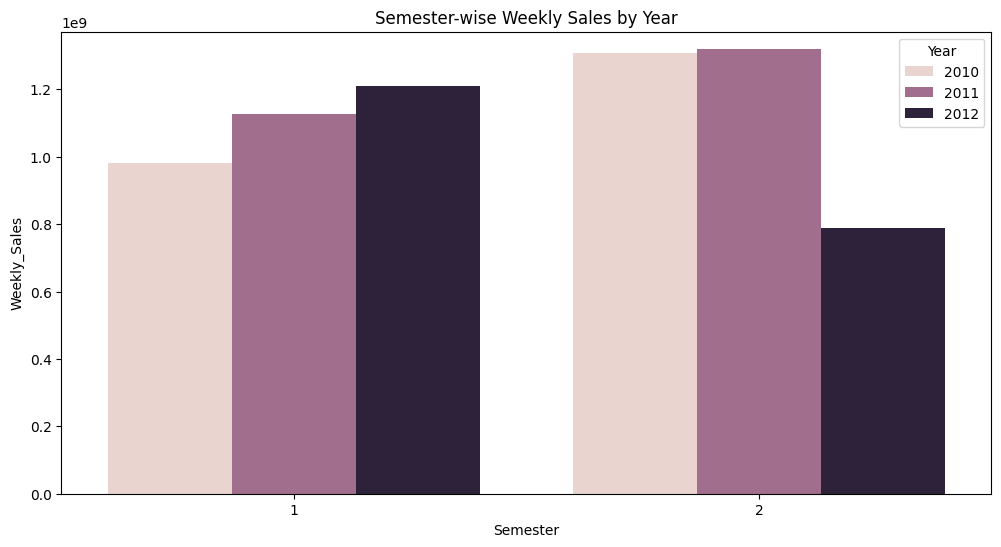

In [66]:

plt.figure(figsize=(12, 6))
sns.barplot(data=semester_sales, x='Semester', y='Weekly_Sales', hue='Year')
plt.title('Semester-wise Weekly Sales by Year') 
plt.ylim(0, semester_sales['Weekly_Sales'].max() + 50000000) 


print(semester_sales['Weekly_Sales'].min())
print(semester_sales['Weekly_Sales'].max())


**Insights**

- ***Semester 1***
  - The lowest Semester 1 sales occurred in **2010**.
  - The highest Semester 1 sales were recorded in **2012**.

- ***Semester 2***
  - The lowest Semester 2 sales occurred in **2012**.
  - The highest Semester 2 sales were recorded in **2010**.


**Monthly Sales Trend Analysis**


In [67]:
walmart_sales['Month'] = walmart_sales['Date'].dt.month


In [68]:
monthly_sales = walmart_sales.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()
monthly_sales.head(5)

,Year,Month,Weekly_Sales
0,2010,2,1.903330e+08
1,2010,3,1.819198e+08
2,2010,4,2.314124e+08
3,2010,5,1.867109e+08
4,2010,6,1.922462e+08


789367442.97
1320860210.04


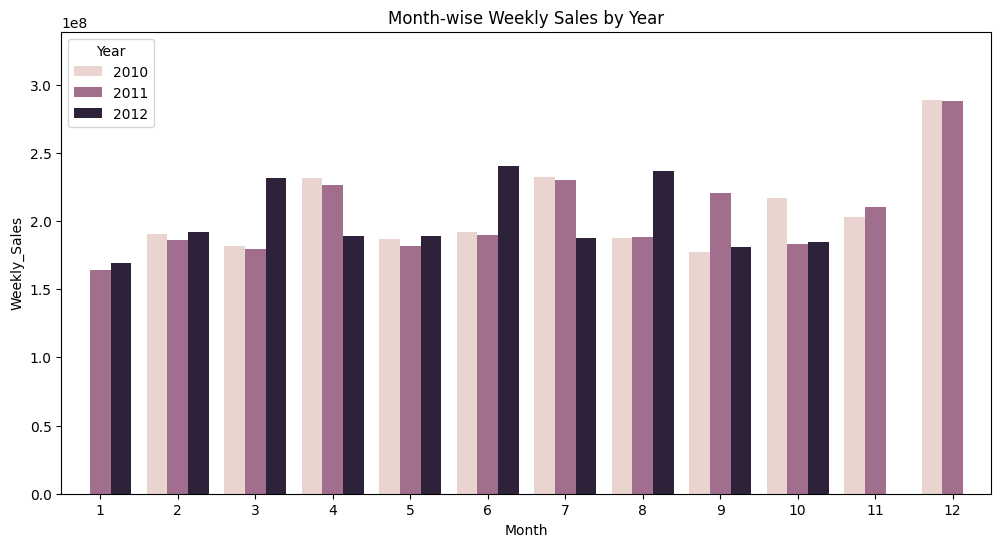

In [69]:

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_sales, x='Month', y='Weekly_Sales', hue='Year')
plt.title('Month-wise Weekly Sales by Year') 
plt.ylim(0, monthly_sales['Weekly_Sales'].max() + 50000000) 


print(semester_sales['Weekly_Sales'].min())
print(semester_sales['Weekly_Sales'].max())


<Axes: xlabel='Month', ylabel='Weekly_Sales'>

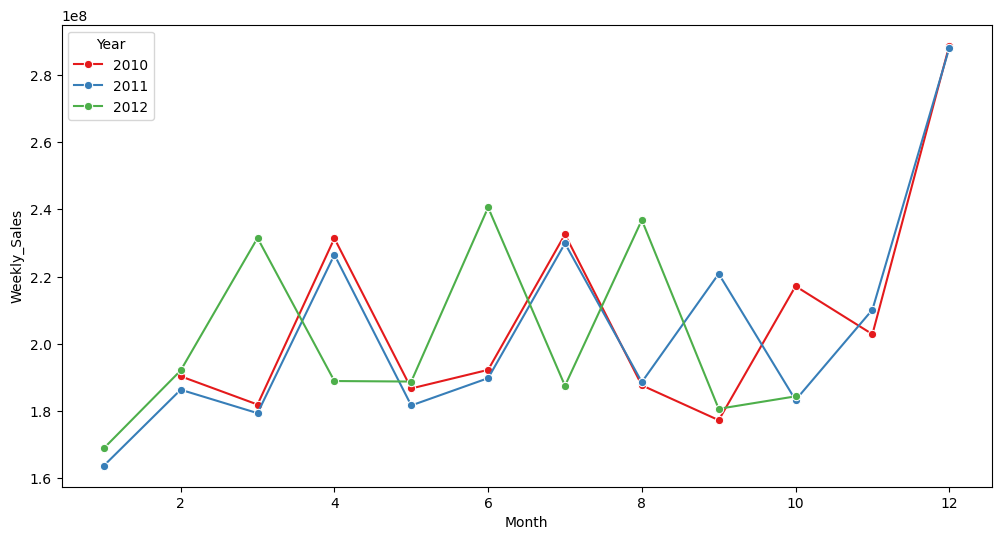

In [70]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=monthly_sales, x='Month', y='Weekly_Sales', hue='Year', palette='Set1', marker='o')   


From the analysis, we plotted the monthly total sales across the years 2010, 2011, and 2012 to observe seasonal patterns and identify irregularities.

The results reveal the following:

- The sales trends in 2010 and 2011 are relatively consistent, showing predictable seasonal peaks and dips.

- 2012, however, displays greater volatility with noticeable spikes and drops in monthly sales, indicating potential irregularities in inventory planning or promotional events.

- These irregularities may reflect overstocking followed by understocking in response to fluctuating demand, possibly leading to missed sales opportunities or excess inventory.

- The lack of Q4 2012 data is evident, but based on previous years, sales typically spike in the final quarter due to holidays like Thanksgiving and Christmas.

- Given this trend, it would be strategic for Walmart to anticipate a significant rise in Q4 2012 sales and optimize inventory and marketing efforts accordingly.



#### Data preprocessing 

In [71]:
walmart_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int32         
 9   Semester      6435 non-null   int64         
 10  Month         6435 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(2), int64(3)
memory usage: 502.9 KB


In [72]:
pre_processed_data = walmart_sales[walmart_sales['Store']== 1].copy()

In [73]:
print(pre_processed_data.isnull().sum())


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Semester        0
Month           0
dtype: int64


In [74]:
holiday_dates = {
    'Super_Bowl': super_bowl_dates,
    'Labour_Day': labour_day_dates,
    'Thanksgiving': thanksgiving_dates,
    'Christmas': christmas_dates
}

for holiday, dates in holiday_dates.items():
    pre_processed_data[holiday] = pre_processed_data['Date'].isin(dates).astype(int)

pre_processed_data['Week'] = (pre_processed_data['Date'] - pre_processed_data['Date'].min()).dt.days // 7 + 1  
cols_to_drop = ['Store', 'Date', 'Year', 'Semester', 'Month', 'Holiday_Flag']
data = pre_processed_data.drop(columns=cols_to_drop)

data['Thanksgiving_CPI'] = data['Thanksgiving'] * data['CPI']

In [75]:
X = data.drop(columns=['Weekly_Sales'])
y = data['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1042)


In [77]:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)



In [78]:
holiday_cols = ['Super_Bowl', 'Labour_Day', 'Thanksgiving', 'Christmas']
sample_weights = np.where(
    X_train[holiday_cols].any(axis=1), 5, 1  # More concise version
)

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train, sample_weight=sample_weights)


LinearRegression()

In [ ]:


y_pred = model.predict(X_test_scaled)
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R² Score: 0.2159
MAE: 103437.37
RMSE: 133175.75
